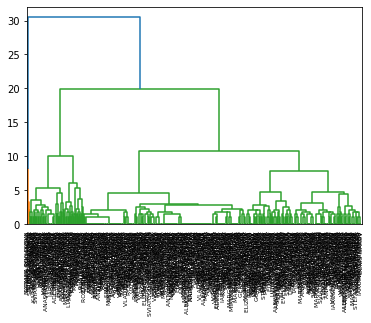

In [1]:
# Определяем оптимальное количество кластеров 
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм
# наши данные - файл experted_data.csv
seeds_df = pd.read_csv(
"./expertdata.txt")
# seeds_df = pd.read_csv(
# "./full_expertdata.txt")

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования

varieties = list(seeds_df.pop('FirstName')+' '+seeds_df.pop('LastName'))
# Извлекаем измерения как массив NumPy
samples = seeds_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()



In [2]:
points = seeds_df.values

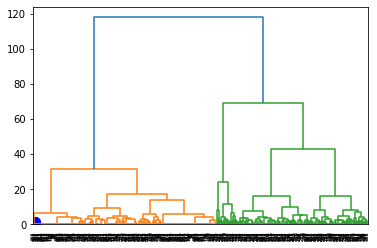

In [3]:
# Строим еще раз более быстро и с более четким разделением на кластеры
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')# save clusters for chart
y_hc = hc.fit_predict(points)
# print(y_hc)
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='cyan')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
# plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='black')
# plt.scatter(points[y_hc ==4,0], points[y_hc == 4,1], s=100, c='yellow')
# plt.scatter(points[y_hc ==5,0], points[y_hc == 5,1], s=100, c='orange')
plt.show()


[[ 2.26829268  0.95121951  0.41869919  0.13821138  1.50406504  0.33333333]
 [11.8630137   0.7260274   1.          0.47945205  9.71232877  0.32876712]
 [ 6.19883041  0.81871345  0.8128655   0.40350877  4.80701754  0.31578947]]


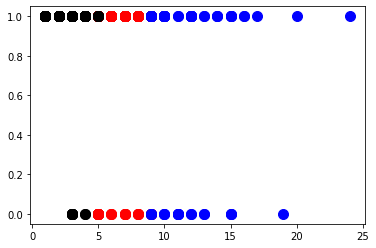

In [4]:
# Делаем тоже самое, но уже с учетом известного значения числа кластеров
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)# fit kmeans object to data
kmeans.fit(points)# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)# save new clusters for chart
y_km = kmeans.fit_predict(points)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
# plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')
# plt.scatter(points[y_hc ==4,0], points[y_hc == 4,1], s=100, c='yellow')
# plt.scatter(points[y_hc ==5,0], points[y_hc == 5,1], s=100, c='orange')
plt.show()
# получилася херня

[[-10.          -9.69387755  -9.3877551  ...   4.3877551    4.69387755
    5.        ]
 [-10.          -9.69387755  -9.3877551  ...   4.3877551    4.69387755
    5.        ]
 [-10.          -9.69387755  -9.3877551  ...   4.3877551    4.69387755
    5.        ]
 ...
 [-10.          -9.69387755  -9.3877551  ...   4.3877551    4.69387755
    5.        ]
 [-10.          -9.69387755  -9.3877551  ...   4.3877551    4.69387755
    5.        ]
 [-10.          -9.69387755  -9.3877551  ...   4.3877551    4.69387755
    5.        ]]


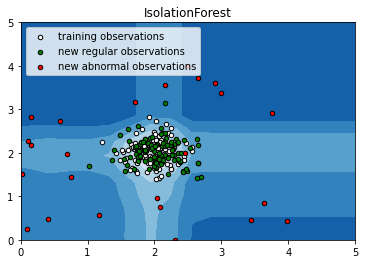

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# print(X_train)
# Generate some regular novel observations
X = 0.3 * rng.randn(100, 2)
X_test = np.r_[X + 2, X - 2]
# print(X_test)
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(100, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-10, 5, 50), np.linspace(-10, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(12)

real_df = pd.read_csv(
"./full_expertdata.txt")
real_df.pop('FirstName')
real_df.pop('LastName')
# Generate train data
X = 0.3 * rng.randn(10717, 6) + 1 
X_train = np.r_[X + 6, X - 6]
# Generate some regular novel observations
X = 0.3 * rng.randn(150, 6)
X_test = points
# Generate some abnormal novel observations
X_outliers = real_df.values

# fit the model
clf = IsolationForest(max_samples=10717, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-10, 5, 50), np.linspace(-10, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Spy")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((0, 50))
plt.ylim((0, 50))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 6 and input n_features is 2.